### Imports

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy
import tensorflow_datasets as tfds
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from scipy.linalg import sqrtm
from tqdm import tqdm
import matplotlib.pyplot as plt

### Display function

In [ ]:
def display_images(images, captions=None):
  num_ver = len(images)//5 + 1
  num_hor = len(images) // num_ver +1
  plt.figure(figsize=(10,10))
  for i in range(len(images)):
    plt.subplot(num_ver,num_hor, i + 1)
    plt.imshow(images[i])
    plt.axis('off')

  plt.tight_layout()

Batch size: how many images to produce

In [ ]:
batch_size=3
shape = [300,300] # outpit size

### Load pre-trained GAN model

In [ ]:
progan = hub.load("https://tfhub.dev/google/progan-128/1").signatures['default']

### Take a random vector of size (batch_size, 512) 

(512 is the size of latent code of  pre-trained model)


In [ ]:
noise = tf.random.normal([batch_size, 512])


### Make a fake images

In [ ]:
fake_img = progan(noise)['default']*255
fake_img = tf.image.resize(fake_img,shape)

### Display images

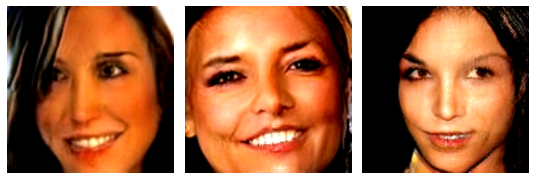

In [ ]:
display_images(fake_img.numpy()/255)

### Run with different inputs (noise vectors) ....